Adaboost Decision Stumps

In [14]:
import sys, itertools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn, time, math
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix

if '../tools' not in sys.path:
    sys.path.append('../tools')
from helper_functions import * 

import warnings
warnings.filterwarnings('ignore')

In [6]:
X, Y = load_all_fv(3,3)
accs = []
for n in range(50, 400, 50):
    stumps = AdaBoostClassifier(n_estimators=n, base_estimator=DecisionTreeClassifier(max_depth=1))
    skf = StratifiedKFold(Y, n_folds=8, shuffle=True, random_state=1)
    accs.append(np.average(cross_val_score(stumps, X, Y, cv=skf, n_jobs=-1)))
    print('finished', n)

Using existing FVs from file ../generated-fv/FV3-3.mat
N = 1000
MFCC training feature ranges means [-0.0201, 0.0090] sds [0.0202, 0.0614]
finished 50
finished 100
finished 150
finished 200
finished 250
finished 300
finished 350


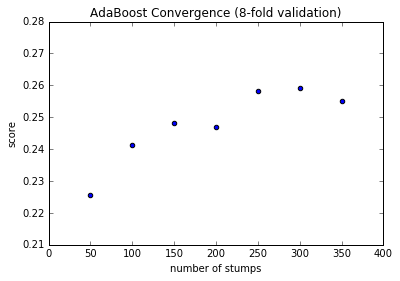

In [8]:
plt.scatter(range(50, 400, 50), accs)
plt.xlabel('number of stumps')
plt.ylabel('score')
plt.title('AdaBoost Convergence (8-fold validation)')
plt.show()

In [17]:
max(accs)

0.25913461538461535

n_estimators 300, train data accuracy 0.3, test accuracy 0.24166666666666667


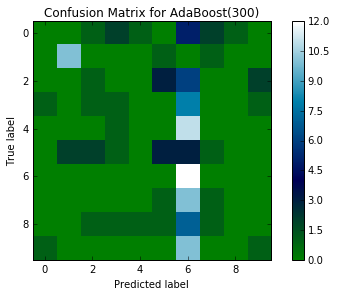

In [15]:
trX, teX, trY, teY = train_test_split(X, Y, stratify=Y,
                                      random_state=1, test_size=(1/8))

stumps = AdaBoostClassifier(n_estimators=300, base_estimator=DecisionTreeClassifier(max_depth=1))
stumps.fit(trX, trY)

print('n_estimators {}, train data accuracy {}, test accuracy {}'.format(
        300, stumps.score(trX, trY), stumps.score(teX, teY)))
plot_confusion_matrix(confusion_matrix(teY, stumps.predict(teX)), title='Confusion Matrix for AdaBoost(300)')
plt.show()